In [2]:
import pandas as pd

In [3]:
# polls_filepath = 'C:/DATA/tsa_claims2.csv'
tsa_claims2_filepath  ='C:/DATA/tsa_claims2.csv'
tsa_claims2_df = pd.read_csv(tsa_claims2_filepath, low_memory=False)   





###  1.What is the most common type of insurance claim?

In [4]:
most_common_claim_type = tsa_claims2_df['Claim Type'].value_counts().index[0]
print(most_common_claim_type)

Passenger Property Loss


###  2.Which claim site within the airport are claims most commonly filed for?

In [5]:
common_claim_site = tsa_claims2_df['Claim Site'].value_counts().index[0]
print("The most common claim site is:", common_claim_site)

The most common claim site is: Checked Baggage


### 3.What type of claim is made most at each claim site?

In [6]:
# Group by Claim Site and Claim Type, then count the number of occurrences
claims_by_site_type = tsa_claims2_df.groupby(['Claim Site', 'Claim Type']).size().reset_index(name='Count')

# Get the index of the maximum count for each claim site
max_counts_by_site = claims_by_site_type.groupby('Claim Site')['Count'].idxmax()

# Subset the original DataFrame with only the rows corresponding to the max count for each claim site
most_common_claim_type_by_site = claims_by_site_type.loc[max_counts_by_site]

# Print the result
print(most_common_claim_type_by_site)


         Claim Site               Claim Type  Count
0                 -                        -    127
7       Bus Station  Passenger Property Loss      9
15  Checked Baggage  Passenger Property Loss  99708
27       Checkpoint          Property Damage  20572
30    Motor Vehicle            Motor Vehicle    320
43            Other          Property Damage    477


### 4.What is the typical claim amount?

In [7]:
# compute summary statistics for Claim Amount
claim_stats = tsa_claims2_df['Claim Amount'].describe()
print(claim_stats)



count     200224
unique     36117
top       $0.00 
freq       28445
Name: Claim Amount, dtype: object


In [8]:
# read the CSV file into a Pandas dataframe
tsa_claims = pd.read_csv('tsa_claims2.csv',low_memory=False, dtype={'Claim Number': str, 'Airport Code': str})

# clean up the Claim Amount column by removing dollar signs and extra whitespace
tsa_claims['Claim Amount'] = tsa_claims['Claim Amount'].str.replace('$', '').str.strip()

# convert the Claim Amount column to numeric values
tsa_claims['Claim Amount'] = pd.to_numeric(tsa_claims['Claim Amount'], errors='coerce')

# calculate the median claim amount
median_claim_amount = tsa_claims['Claim Amount'].median()

# print the result to the console
print("The typical claim amount is $" + str(median_claim_amount))

The typical claim amount is $95.0


### 5.What is the overall claim approval rate for the entire U.S.?

In [9]:
# Filter for only U.S. claims
us_claims = tsa_claims2_df[tsa_claims2_df['Claim Site'] == 'Checkpoint']

# Calculate total number of claims
total_claims = len(us_claims)

# Calculate number of approved claims
approved_claims = len(us_claims[us_claims['Status'] == 'Approved'])

# Calculate claim approval rate
approval_rate = approved_claims / total_claims * 100

# Print result
print(f"The overall claim approval rate for the entire U.S. is {approval_rate:.2f}%")


The overall claim approval rate for the entire U.S. is 22.01%


### 6.If a claim is approved or settled, what percent of the claim amount do the airports pay?

In [10]:
# Select the desired columns and convert the 'Claim Amount' and 'Close Amount' columns to numeric
selected_cols = ['Claim Amount', 'Close Amount', 'Disposition']
tsa_claims_filtered = tsa_claims2_df[selected_cols]

# Filter the DataFrame to include only rows with Disposition of "Approve in Full" or "Settle"
tsa_claims_filtered = tsa_claims_filtered[tsa_claims2_df['Disposition'].isin(['Approve in Full', 'Settle'])]

# Sort the DataFrame by Claim Amount, Close Amount, and Disposition
tsa_claims_sorted = tsa_claims_filtered.sort_values(by=['Claim Amount', 'Close Amount', 'Disposition'], ascending=False)

# Print the sorted DataFrame
print(tsa_claims_sorted.head())

       Claim Amount Close Amount Disposition
133852   $9;500.00      $190.00       Settle
40306    $9;494.13    $3;094.13       Settle
110777   $9;398.00    $2;750.00       Settle
4187     $9;242.48    $1;044.74       Settle
10025    $9;175.00    $2;000.00       Settle


### 7.What are the five airports with the most claims?

In [11]:
import pandas as pd

# Load the TSA claims dataset into a pandas dataframe
tsa_claims2_df = pd.read_csv('tsa_claims2.csv',low_memory=False)

# Group the claims by airport code and count the number of claims for each airport
claims_by_airport = tsa_claims2_df.groupby('Airport Code').size().reset_index(name='Claim Count')

# Sort the airports in descending order by the count of claims
top_airports = claims_by_airport.sort_values('Claim Count', ascending=False).head(5)

print("The five airports with the most claims are:\n")
for i, row in top_airports.iterrows():
    print(f"{i+1}. {row['Airport Code']} with {row['Claim Count']} claims")


The five airports with the most claims are:

247. LAX with 9596 claims
233. JFK with 9232 claims
139. EWR with 6866 claims
322. ORD with 6843 claims
289. MIA with 6432 claims


###  8.Has the total close amount increased or decreased over time

Total price values after reading dataset
0    350.00
1     50.00
2    227.92
3     50.00
4     84.79
Name: Close Amount, dtype: float64
Total price values after using pd.to_numeric
0    350.00
1     50.00
2    227.92
3     50.00
4     84.79
Name: Close Amount, dtype: float64


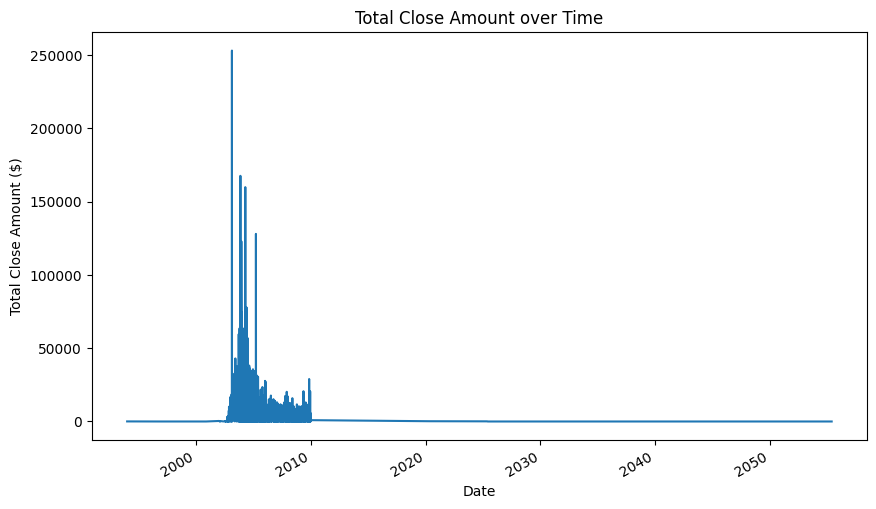

In [30]:
# Print preview to show price has $ which prevents the series from being numeric data type
print('Total price values after reading dataset')
print(tsa_claims2_df['Close Amount'][0:5])

# Convert Close Amount column to numeric format
tsa_claims2_df['Close Amount'] = pd.to_numeric(tsa_claims2_df['Close Amount'], errors='coerce')

# Convert Date Received column to datetime format
tsa_claims2_df['Date Received'] = pd.to_datetime(tsa_claims2_df['Date Received'], format='%d-%b-%y')

# Group data by date and sum the Total Close Amount for each date
claims_by_date = tsa_claims2_df.groupby('Date Received')['Close Amount'].sum()

# Print preview to show bad conversion using pd.to_numeric, null values returned because we need to remove $
print('Total price values after using pd.to_numeric')
print(tsa_claims2_df['Close Amount'][0:5])

# Plot the Total Close Amount over time
claims_by_date.plot(figsize=(10,6))
plt.title('Total Close Amount over Time')
plt.xlabel('Date')
plt.ylabel('Total Close Amount ($)')
plt.show()
